In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D,AveragePooling2D
from google.colab.patches import cv2_imshow


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path="/content/drive/MyDrive/dataset/training_dataset"
test_path="/content/drive/MyDrive/dataset/validation_set"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names)
print(class_names_test)

['non notes', 'notes']
['notes', 'non notes']


In [ ]:

#training_dir = '/content/drive/MyDrive/dataset/training_dataset' #To be changed
#validation_dir = '/content/drive/MyDrive/dataset/validation_set' #To be changed
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()


In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/dataset/training_dataset",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/validation_set",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 1932 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [ ]:
from keras.models.cloning import InputLayer
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model





In [ ]:
model=VGG16()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [ ]:
#Vgg16.load_weights("/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
for layer in Vgg16.layers:
    layer.trainable = False    #False means that the weights of these layers will not be updated during training.
                              # true  means model weights are updating durining training

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc16b1bf5e0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc16918fa00> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc16918ffd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc168121520> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc168127e80> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc168a0bfa0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc1680b2670> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc1680b6af0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc1680b2370> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc1680b6040> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc1680c4940> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc1680c4400> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc168123970> False
<keras.layers.poo

In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
H = model.fit_generator(train_generator,
                        epochs=5,
                        verbose=1,
                        validation_data=test_generator,
                        callbacks=[mc,es])


<ipython-input-17-5f7646e9ece4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_generator,


Epoch 1/5
61/61 [==============================] - 819s 13s/step - loss: 0.6551 - accuracy: 0.6517 - val_loss: 0.6095 - val_accuracy: 0.8967
Epoch 2/5
61/61 [==============================] - 214s 4s/step - loss: 0.5695 - accuracy: 0.8903 - val_loss: 0.5288 - val_accuracy: 0.9557
Epoch 3/5
61/61 [==============================] - 231s 4s/step - loss: 0.4940 - accuracy: 0.9343 - val_loss: 0.4558 - val_accuracy: 0.9803
Epoch 4/5
61/61 [==============================] - 227s 4s/step - loss: 0.4283 - accuracy: 0.9534 - val_loss: 0.3943 - val_accuracy: 0.9787
Epoch 5/5
61/61 [==============================] - 236s 4s/step - loss: 0.3776 - accuracy: 0.9493 - val_loss: 0.3464 - val_accuracy: 0.9607


In [ ]:
from tensorflow.keras.models import load_model
model.save('mini_project.h5')

In [ ]:
 model.load_weights("/content/gdrive/My Drive/best_model.h5")

In [ ]:
model.evaluate(test_generator)

20/20 [==============================] - 41s 2s/step - loss: 0.4558 - accuracy: 0.9803


[0.4557911455631256, 0.980327844619751]

In [ ]:
model.predict(test_generator)

20/20 [==============================] - 44s 2s/step


array([[0.26469278],
       [0.22239313],
       [0.4490827 ],
       [0.23904148],
       [0.3016652 ],
       [0.33966953],
       [0.42492786],
       [0.37771443],
       [0.34593722],
       [0.35476667],
       [0.27789474],
       [0.29076067],
       [0.19395927],
       [0.17753297],
       [0.2774767 ],
       [0.32787567],
       [0.39840555],
       [0.42679688],
       [0.2098579 ],
       [0.22310555],
       [0.2845984 ],
       [0.29082242],
       [0.44633058],
       [0.25493428],
       [0.39430654],
       [0.24317326],
       [0.30179664],
       [0.23600118],
       [0.24458009],
       [0.34705338],
       [0.42171085],
       [0.326047  ],
       [0.25911292],
       [0.28724128],
       [0.46531388],
       [0.54860854],
       [0.3009996 ],
       [0.35109898],
       [0.3759535 ],
       [0.37548935],
       [0.25615576],
       [0.04970216],
       [0.22083579],
       [0.20009522],
       [0.17977294],
       [0.43630147],
       [0.46467048],
       [0.257

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image


st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/mini_project.h5',custom_objects={'KerasLayer':hub.KerasLayer})
  return model
model=load_model()
st.write("""
          #  bean image classification""")
file = st.file_uploader("please upload an  image",type=["jpg","png"])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):

  size = (224,224)
  image = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]
  prediction =model.predict(img_reshape)

  return prediction
if file is None:
  st.text("please upload an image file")
else:
  image = Image.open(file)
  st.image(image,use_column_width=True)
  prediction = import_and_predict(image,model)
  class_names =['non notes', 'notes']
  string='this image most likely is :'+class_names[np.argmax(prediction)]
  st.success(string)

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[#######...........] \ extract:localtunnel: verb lock using /root/.npm/_locks/s

npx: installed 22 in 4.78s
your url is: https://neat-worlds-end-35-199-164-118.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.164.118:8501

2023-04-25 17:57:40.636819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-25 17:57:46.686128: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-04-25 17:57:47.623 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2023-04-25 17:59:27.331 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data

In [ ]:
batch_size=32

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
num_of_train_samples = 1932
num_of_test_samples = 610

In [ ]:
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print(confusion_matrix(test_generator.classes, y_pred))
print('Confusion Matrix')
print('Classification Report')
target_names = ['non-notes', 'Notes']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import model_from_json

In [ ]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/My Drive/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/My Drive/best_model.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if (preds<=0.4445):
        print("Predicted Label:non-notes")
    else:
        print("Predicted Label: Notes")

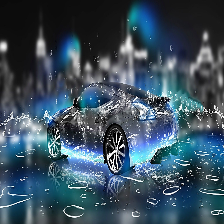

1/1 [==============================] - 0s 227ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/car.jpg")

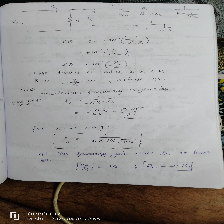

1/1 [==============================] - 0s 148ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/IMG20230403225508.jpg")

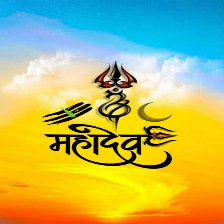

1/1 [==============================] - 0s 154ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/mahadev.jpg")

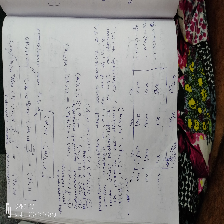

1/1 [==============================] - 0s 142ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/IMG20230403231029.jpg")


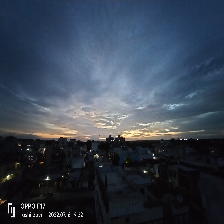

1/1 [==============================] - 0s 159ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/IMG20220716192246.jpg")

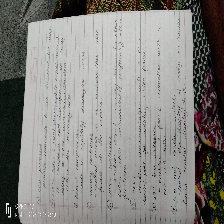

1/1 [==============================] - 0s 207ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/IMG20230403231050.jpg")

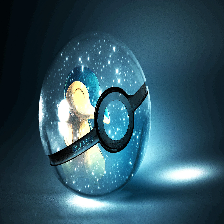

1/1 [==============================] - 0s 136ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/pokemon.webp")

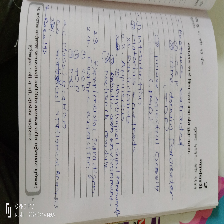

1/1 [==============================] - 0s 139ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/IMG20230414140906.jpg")

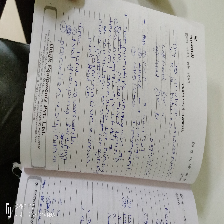

1/1 [==============================] - 0s 149ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/IMG20230414140908.jpg")

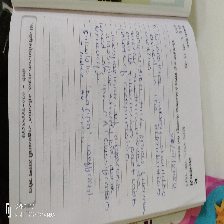

1/1 [==============================] - 0s 214ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/IMG20230414140913.jpg")

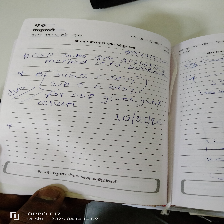

1/1 [==============================] - 0s 137ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/IMG20230414140920[1].jpg")

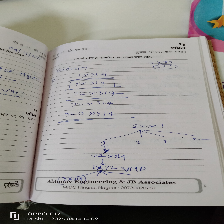

1/1 [==============================] - 0s 144ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/IMG20230414140927[1].jpg")

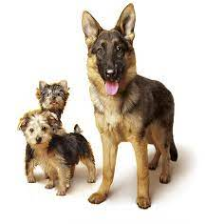

1/1 [==============================] - 0s 147ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes/download (2).jpeg")

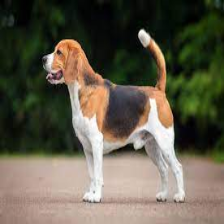

1/1 [==============================] - 0s 143ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes/download (3).jpeg")

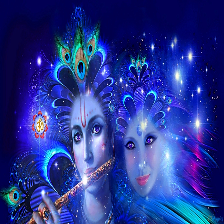

1/1 [==============================] - 0s 142ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes4.jpg")

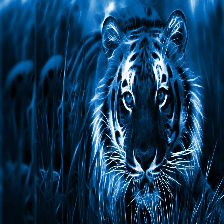

1/1 [==============================] - 0s 136ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes5.jpg")

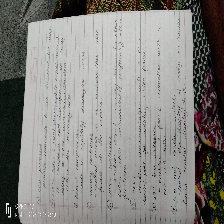

1/1 [==============================] - 0s 211ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/Notes.jpg")

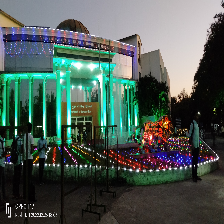

1/1 [==============================] - 0s 215ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes6 (1).jpg")

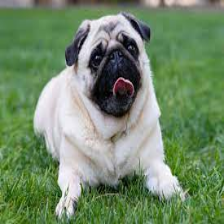

1/1 [==============================] - 0s 171ms/step
Predicted Label:non-notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes/download (4).jpeg")

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


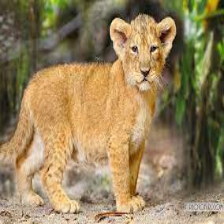

1/1 [==============================] - 0s 140ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes/download (5).jpeg")

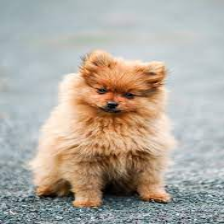

1/1 [==============================] - 0s 142ms/step
Predicted Label: Notes


In [ ]:
predict_("/content/drive/MyDrive/dataset/test_set/non_notes/download.jpeg")
